In [1]:
import sys
sys.path.append('C:\\Users\\Hasegawa\\Desktop\\AIT Note\\Thesis\\thesis-code\\Soft-Actor-Critic')

In [2]:
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt

from PIL import Image
from common.network import ConvVAE
from torchinfo import summary

In [3]:
model = ConvVAE((270, 480), latent_size=512, beta=3)

In [4]:
# inspect model
image_size = (270, 480)
summary(model, input_size=(1, 3, *image_size))

Layer (type:depth-idx)                   Output Shape              Param #
ConvVAE                                  --                        --
├─Sequential: 1-1                        [1, 64, 6, 13]            --
│    └─Conv2d: 2-1                       [1, 16, 134, 239]         784
│    └─BatchNorm2d: 2-2                  [1, 16, 134, 239]         32
│    └─ReLU: 2-3                         [1, 16, 134, 239]         --
│    └─Conv2d: 2-4                       [1, 32, 66, 118]          8,224
│    └─BatchNorm2d: 2-5                  [1, 32, 66, 118]          64
│    └─ReLU: 2-6                         [1, 32, 66, 118]          --
│    └─Conv2d: 2-7                       [1, 32, 32, 58]           16,416
│    └─BatchNorm2d: 2-8                  [1, 32, 32, 58]           64
│    └─ReLU: 2-9                         [1, 32, 32, 58]           --
│    └─Conv2d: 2-10                      [1, 64, 15, 28]           32,832
│    └─BatchNorm2d: 2-11                 [1, 64, 15, 28]           128
│ 

In [5]:
model.load_model('bvae_town7_epoch(50)-loss(+2.506E+05).pkl')

<All keys matched successfully>

In [6]:
to_tensor = T.ToTensor()

In [7]:
test_image = Image.open('town7_outskirts_2773.jpeg')

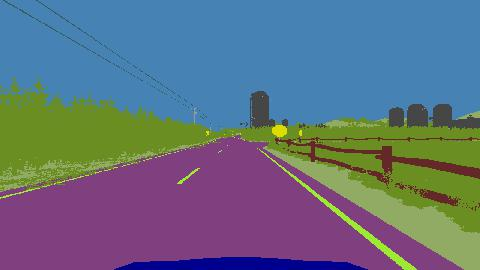

In [8]:
test_image

In [9]:
output = model(to_tensor(test_image).unsqueeze(dim=0))

In [10]:
out_np_array = output[0].squeeze(dim=0).detach().numpy()
out_np_img = (out_np_array.transpose(1, 2, 0) * 255).astype('uint8')

In [11]:
output_image = Image.fromarray(out_np_img)

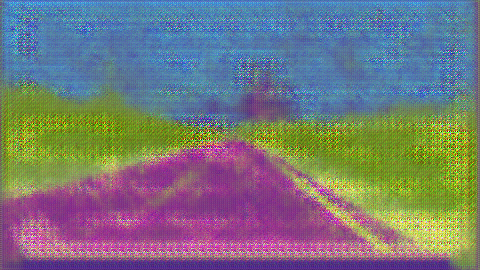

In [12]:
output_image

In [13]:
original_img_np = np.array(test_image)

In [15]:
assert out_np_img.shape == original_img_np.shape
original_img_np.shape

(270, 480, 3)

In [19]:
combined_img_np = np.hstack([original_img_np, out_np_img])

In [20]:
combined_img = Image.fromarray(combined_img_np)

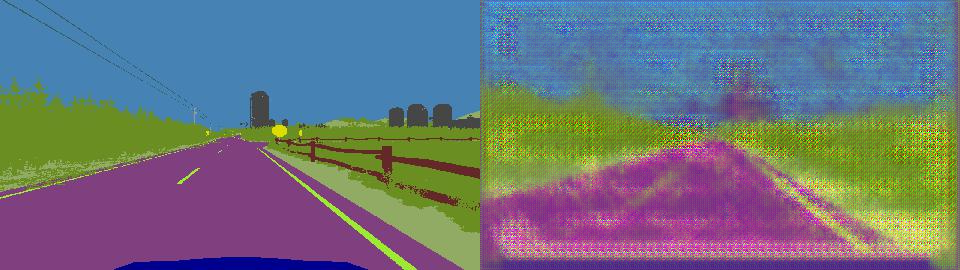

In [21]:
combined_img